In [25]:
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import pickle
from sklearn import tree

# Import LabelEncoder
from sklearn import preprocessing
# Library untuk feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Library untuk algoritma klasifikasi KNN
from sklearn.neighbors import KNeighborsClassifier
#Import scikit-learn metrics module for accuracy calculation
#from sklearn import metrics

drive.mount("/content/drive")
path = "/content/drive/MyDrive/Capstone/exercise_datasetV2.csv"
df = pd.read_csv(path)
print(df.head())
banyak_kategori = len(df.index)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
  Activity, Exercise or Sport (1 hour) Intensity Description  \
0          Cycling, mountain bike, bmx                   NaN   
1  Cycling, <10 mph, leisure bicycling                   NaN   
2             Cycling, >20 mph, racing                   NaN   
3          Cycling, 10-11.9 mph, light                   NaN   
4       Cycling, 12-13.9 mph, moderate                   NaN   

   Duration (minutes)  Calories per kg  
0                  60         1.750730  
1                  60         0.823236  
2                  60         3.294974  
3                  60         1.234853  
4                  60         1.647825  


In [26]:
list_berat = []
for i in range(len(df.index)):
  list_berat.append(1)

df['berat'] =  list_berat
dict_df = {'Activity, Exercise or Sport (1 hour)' : [], 'Duration (minutes)': [], 'Calories per kg': [], 'berat' : []}
df_new = df
for index, row in df.iterrows():
  print(index)
  menit = row['Duration (minutes)']
  activity = row['Activity, Exercise or Sport (1 hour)']
  calories = row['Calories per kg']
  for i in range(1,menit):
    for j in range(2,101):
      new_calories = calories*1.0/60*i*j
      list_activity = dict_df.get('Activity, Exercise or Sport (1 hour)')
      list_duration = dict_df.get('Duration (minutes)')
      list_calories = dict_df.get('Calories per kg')
      list_berat = dict_df.get('berat')
      list_activity.append(activity)
      list_duration.append(i)
      list_calories.append(new_calories)
      list_berat.append(j)
      #new_row = pd.DataFrame({'Activity, Exercise or Sport (1 hour)' : [activity], 'Duration (minutes)': [i], 'Calories per kg': [new_calories], 'berat' : [j]})
      
df_curr = pd.DataFrame(dict_df)   
df_new = pd.concat([df_curr, df_new.loc[:]]).reset_index(drop=True)
#df2 = pd.concat([new_row,df.loc[:]]).reset_index(drop=True)
print(df_new.head())
print(df_new.tail())

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
  Activity, Exercise or Sport (1 hour)  Duration (minutes)  Calories per kg  \
0          Cycling, mountain bike, bmx 

In [27]:
print(len(df_new.index))
print(df_new.describe())
print(df_new.dtypes)
df_new.rename(columns = {'Activity, Exercise or Sport (1 hour)':'activity', 'Duration (minutes)' : 'durasi' , 'Calories per kg' : 'calories' }, inplace = True)
print(df_new.head())

1448816
       Duration (minutes)  Calories per kg         berat
count        1.448816e+06     1.448816e+06  1.448816e+06
mean         3.000514e+01     3.467251e+01  5.099144e+01
std          1.703246e+01     3.748635e+01  2.858243e+01
min          1.000000e+00     1.033558e-02  1.000000e+00
25%          1.500000e+01     8.237434e+00  2.600000e+01
50%          3.000000e+01     2.219663e+01  5.100000e+01
75%          4.500000e+01     4.774767e+01  7.600000e+01
max          6.000000e+01     3.644815e+02  1.000000e+02
Activity, Exercise or Sport (1 hour)     object
Duration (minutes)                        int64
Calories per kg                         float64
berat                                     int64
Intensity Description                    object
dtype: object
                      activity  durasi  calories  berat Intensity Description
0  Cycling, mountain bike, bmx       1  0.058358      2                   NaN
1  Cycling, mountain bike, bmx       1  0.087536      3              

In [28]:
target = df['Activity, Exercise or Sport (1 hour)']
print(df_new.head())
numeric_feature_names = ['durasi', 'calories', 'berat']
numeric_features = df_new[numeric_feature_names]
numeric_features.head()

                      activity  durasi  calories  berat Intensity Description
0  Cycling, mountain bike, bmx       1  0.058358      2                   NaN
1  Cycling, mountain bike, bmx       1  0.087536      3                   NaN
2  Cycling, mountain bike, bmx       1  0.116715      4                   NaN
3  Cycling, mountain bike, bmx       1  0.145894      5                   NaN
4  Cycling, mountain bike, bmx       1  0.175073      6                   NaN


,durasi,calories,berat
0,1,0.058358,2
1,1,0.087536,3
2,1,0.116715,4
3,1,0.145894,5
4,1,0.175073,6


In [29]:
jumlah_class = len(df_new['activity'].value_counts())
print(jumlah_class)

248


In [30]:
df_new['activity'] = df_new['activity'].astype('category')
df_new['activity_category'] = df_new['activity'].cat.codes.astype('category')
print(df_new.head())

                      activity  durasi  calories  berat Intensity Description  \
0  Cycling, mountain bike, bmx       1  0.058358      2                   NaN   
1  Cycling, mountain bike, bmx       1  0.087536      3                   NaN   
2  Cycling, mountain bike, bmx       1  0.116715      4                   NaN   
3  Cycling, mountain bike, bmx       1  0.145894      5                   NaN   
4  Cycling, mountain bike, bmx       1  0.175073      6                   NaN   

  activity_category  
0                61  
1                61  
2                61  
3                61  
4                61  


In [31]:
df_new_2 = df_new.drop(columns = ['activity', 'Intensity Description'])

In [32]:
df_new_2['durasi'] = MinMaxScaler().fit_transform(np.array(df_new_2['durasi']).reshape(-1,1))
df_new_2['calories'] = MinMaxScaler().fit_transform(np.array(df_new_2['calories']).reshape(-1,1))
df_new_2['berat'] = MinMaxScaler().fit_transform(np.array(df_new_2['berat']).reshape(-1,1))

In [33]:
df_fitur = df_new_2[['durasi', 'calories', 'berat']]
fitur_np = np.array(df_fitur.values)

In [34]:
label_np = np.array(df_new['activity_category'].values)

In [35]:
listPrecision = []
listAccuracy = []
listRecall = []
listF1_score = []
listSupport = []

In [36]:
X = fitur_np
Y = np.array(df_new['activity'].values)
activity_classes = df_new.activity.unique()

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3) 

In [15]:
# entropy
for depth in range(2,201): 
  DT_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth= depth)
  DT_model.fit(X_train,Y_train)
  Y_pred = DT_model.predict(X_test)
  report = classification_report(Y_test, Y_pred, output_dict=True, target_names = activity_classes, zero_division=1)
  precision = report['macro avg']['precision'] 
  listPrecision.append(precision)

  accuracy = report['accuracy'] 
  listAccuracy.append(accuracy)

  recall = report['macro avg']['recall'] 
  listRecall.append(recall)

  f1_score = report['macro avg']['f1-score'] 
  listF1_score.append(f1_score)

  support = report['macro avg']['support'] 
  listSupport.append(support)

In [18]:
idx = [*range(2,201)]
df_report = pd.DataFrame(list(zip(listPrecision, listAccuracy, listRecall, listF1_score, listSupport)),
               columns =['precision', 'accuracy', 'recall', 'f1_score', 'support'], index = idx)

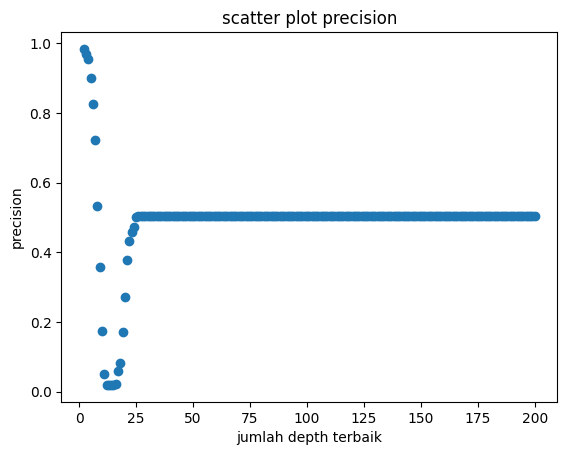

In [19]:
import matplotlib.pyplot as plt
plt.scatter(idx,df_report['precision'])
plt.title("scatter plot precision")
plt.xlabel("jumlah depth terbaik")
plt.ylabel("precision")
plt.show()

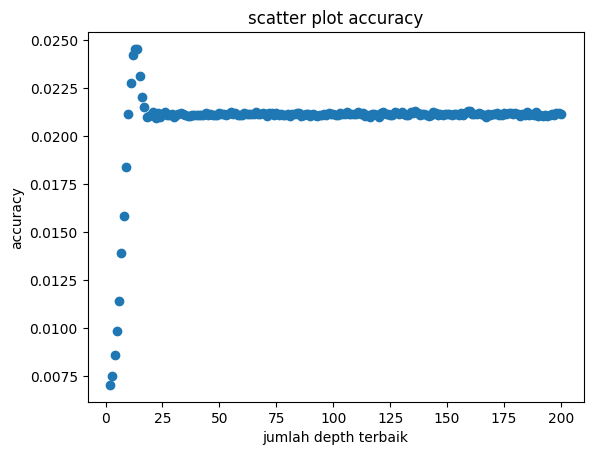

In [20]:
import matplotlib.pyplot as plt
plt.scatter(idx,df_report['accuracy'])
plt.title("scatter plot accuracy")
plt.xlabel("jumlah depth terbaik")
plt.ylabel("accuracy")
plt.show()

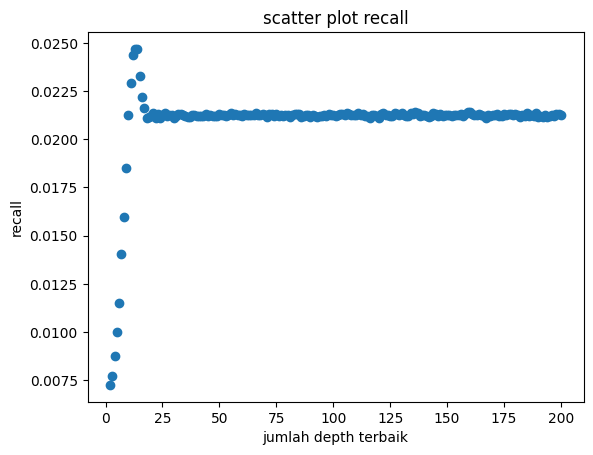

In [21]:
import matplotlib.pyplot as plt
plt.scatter(idx,df_report['recall'])
plt.title("scatter plot recall")
plt.xlabel("jumlah depth terbaik")
plt.ylabel("recall")
plt.show()

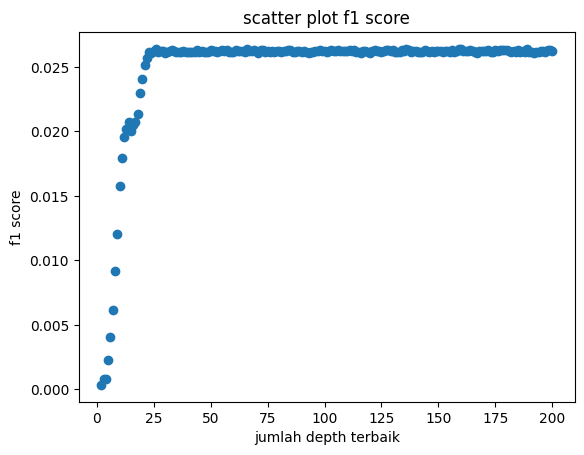

In [22]:
import matplotlib.pyplot as plt
plt.scatter(idx,df_report['f1_score'])
plt.title("scatter plot f1 score")
plt.xlabel("jumlah depth terbaik")
plt.ylabel("f1 score")
plt.show()

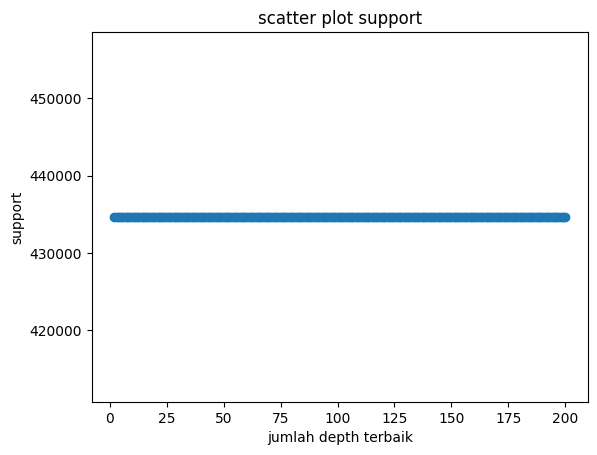

In [23]:

import matplotlib.pyplot as plt
plt.scatter(idx,df_report['support'])
plt.title("scatter plot support")
plt.xlabel("jumlah depth terbaik")
plt.ylabel("support")
plt.show()

In [38]:
listPrecision = []
listAccuracy = []
listRecall = []
listF1_score = []
listSupport = []

In [39]:
# gini
for depth in range(2,201): 
  print(depth)
  DT_model = tree.DecisionTreeClassifier(criterion='gini', max_depth= depth)
  DT_model.fit(X_train,Y_train)
  Y_pred = DT_model.predict(X_test)
  report = classification_report(Y_test, Y_pred, output_dict=True, target_names = activity_classes, zero_division=1)
  precision = report['macro avg']['precision'] 
  listPrecision.append(precision)

  accuracy = report['accuracy'] 
  listAccuracy.append(accuracy)

  recall = report['macro avg']['recall'] 
  listRecall.append(recall)

  f1_score = report['macro avg']['f1-score'] 
  listF1_score.append(f1_score)

  support = report['macro avg']['support'] 
  listSupport.append(support)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200


In [40]:
idx = [*range(2,201)]
df_report = pd.DataFrame(list(zip(listPrecision, listAccuracy, listRecall, listF1_score, listSupport)),
               columns =['precision', 'accuracy', 'recall', 'f1_score', 'support'], index = idx)

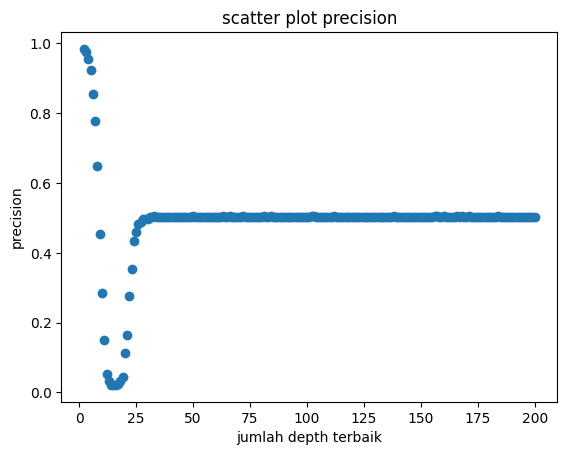

In [41]:
import matplotlib.pyplot as plt
plt.scatter(idx,df_report['precision'])
plt.title("scatter plot precision")
plt.xlabel("jumlah depth terbaik")
plt.ylabel("precision")
plt.show()

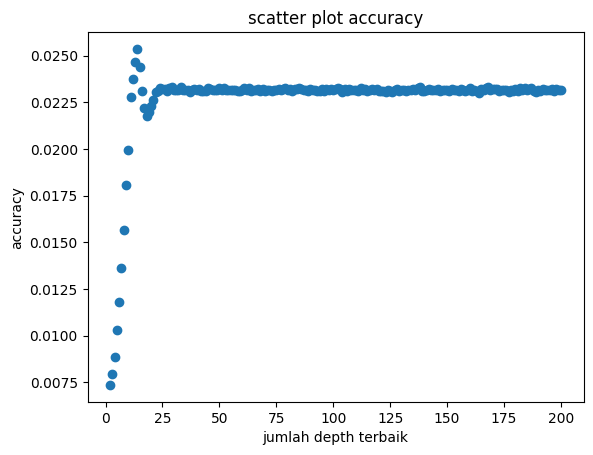

In [42]:
import matplotlib.pyplot as plt
plt.scatter(idx,df_report['accuracy'])
plt.title("scatter plot accuracy")
plt.xlabel("jumlah depth terbaik")
plt.ylabel("accuracy")
plt.show()

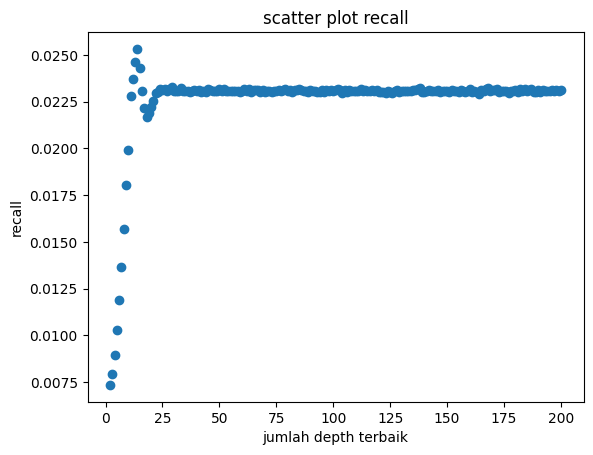

In [43]:
import matplotlib.pyplot as plt
plt.scatter(idx,df_report['recall'])
plt.title("scatter plot recall")
plt.xlabel("jumlah depth terbaik")
plt.ylabel("recall")
plt.show()

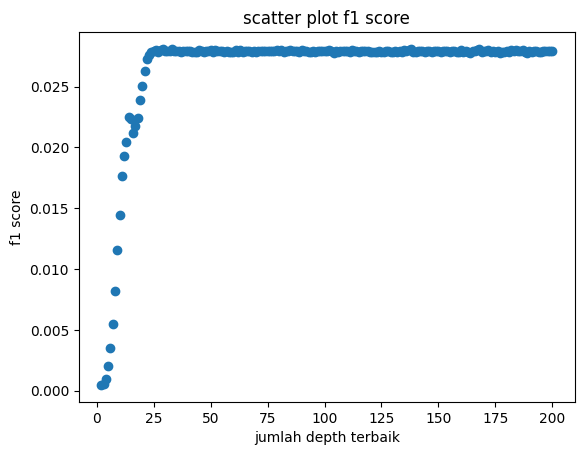

In [44]:
import matplotlib.pyplot as plt
plt.scatter(idx,df_report['f1_score'])
plt.title("scatter plot f1 score")
plt.xlabel("jumlah depth terbaik")
plt.ylabel("f1 score")
plt.show()

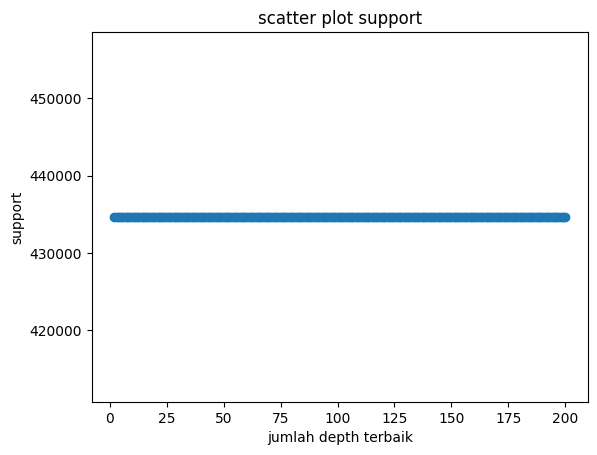

In [45]:
import matplotlib.pyplot as plt
plt.scatter(idx,df_report['support'])
plt.title("scatter plot support")
plt.xlabel("jumlah depth terbaik")
plt.ylabel("support")
plt.show()

In [46]:
listPrecision = []
listAccuracy = []
listRecall = []
listF1_score = []
listSupport = []

In [47]:
for depth in range(2,201): 
  DT_model = tree.DecisionTreeClassifier(criterion='log_loss', max_depth= depth)
  DT_model.fit(X_train,Y_train)
  Y_pred = DT_model.predict(X_test)
  report = classification_report(Y_test, Y_pred, output_dict=True, target_names = activity_classes, zero_division=1)
  precision = report['macro avg']['precision'] 
  listPrecision.append(precision)

  accuracy = report['accuracy'] 
  listAccuracy.append(accuracy)

  recall = report['macro avg']['recall'] 
  listRecall.append(recall)

  f1_score = report['macro avg']['f1-score'] 
  listF1_score.append(f1_score)

  support = report['macro avg']['support'] 
  listSupport.append(support)

In [48]:
idx = [*range(2,201)]
df_report = pd.DataFrame(list(zip(listPrecision, listAccuracy, listRecall, listF1_score, listSupport)),
               columns =['precision', 'accuracy', 'recall', 'f1_score', 'support'], index = idx)

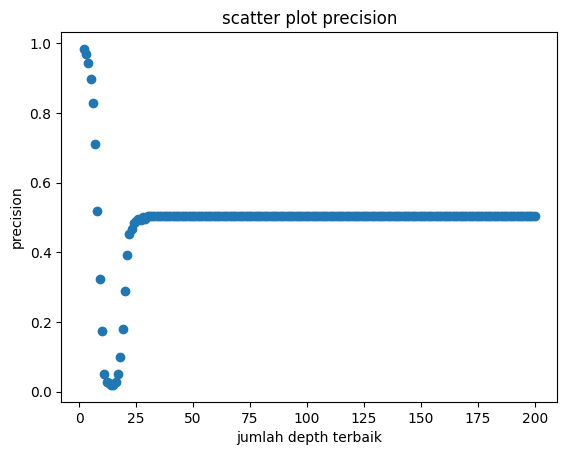

In [49]:
import matplotlib.pyplot as plt
plt.scatter(idx,df_report['precision'])
plt.title("scatter plot precision")
plt.xlabel("jumlah depth terbaik")
plt.ylabel("precision")
plt.show()

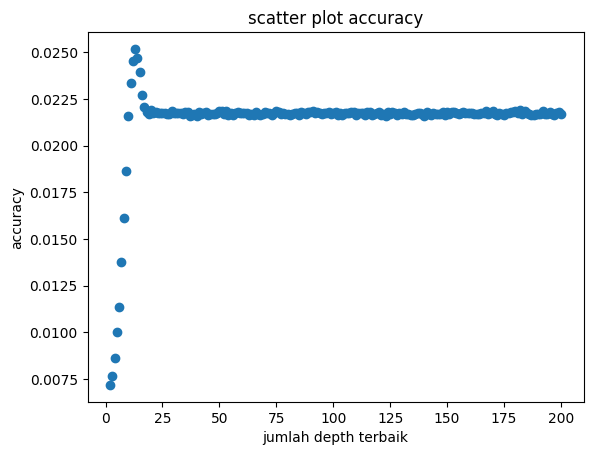

In [50]:
import matplotlib.pyplot as plt
plt.scatter(idx,df_report['accuracy'])
plt.title("scatter plot accuracy")
plt.xlabel("jumlah depth terbaik")
plt.ylabel("accuracy")
plt.show()

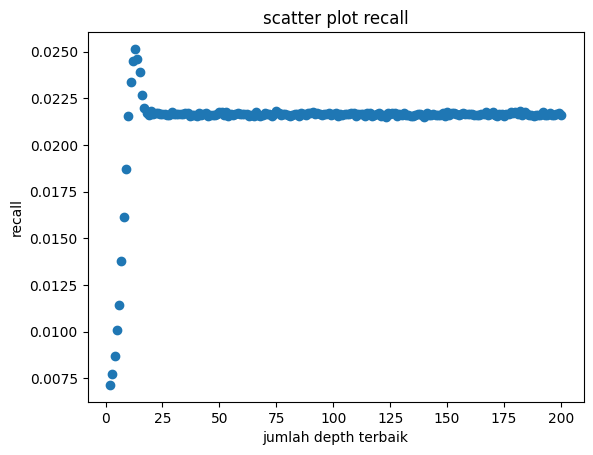

In [51]:
import matplotlib.pyplot as plt
plt.scatter(idx,df_report['recall'])
plt.title("scatter plot recall")
plt.xlabel("jumlah depth terbaik")
plt.ylabel("recall")
plt.show()

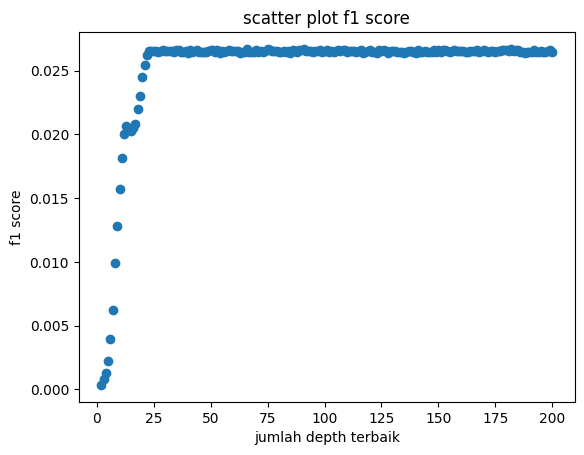

In [52]:
import matplotlib.pyplot as plt
plt.scatter(idx,df_report['f1_score'])
plt.title("scatter plot f1 score")
plt.xlabel("jumlah depth terbaik")
plt.ylabel("f1 score")
plt.show()

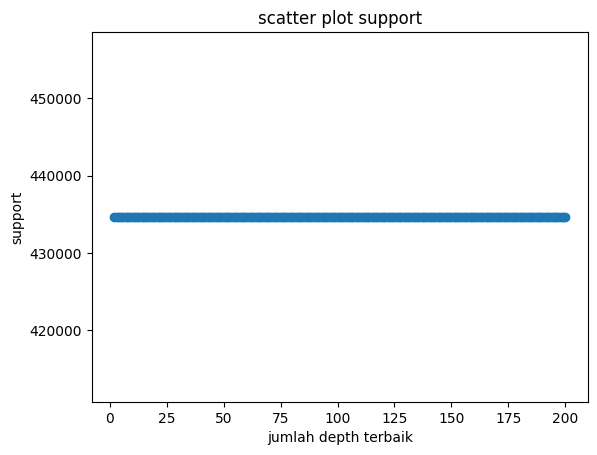

In [53]:
import matplotlib.pyplot as plt
plt.scatter(idx,df_report['support'])
plt.title("scatter plot support")
plt.xlabel("jumlah depth terbaik")
plt.ylabel("support")
plt.show()